In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [85]:
bank_data=pd.read_csv("/content/bank_marketing_dataset.csv")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [86]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [87]:
bank_data.shape

(41188, 21)

##**Data Preprocessing**

In [88]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [89]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [90]:
bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


###**Exploratory Data Analysis**

####Age Distribution

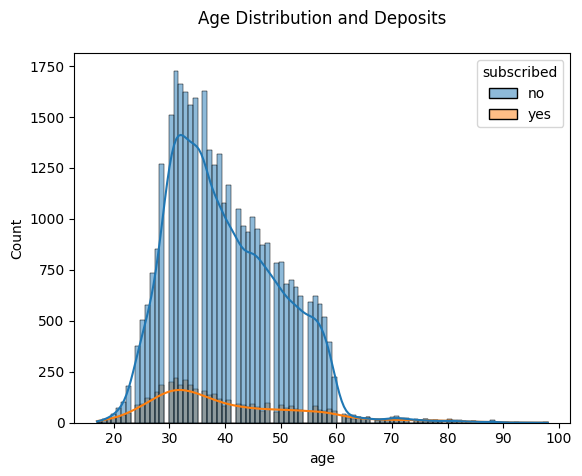

In [91]:
sns.histplot(x="age", data=bank_data, kde=True, hue= "subscribed")
plt.title("Age Distribution and Deposits\n")
plt.show()

The maximum clients are between the ages of 30 - 40, and majority of clients subscribing to Term Deposit also fall between these age groups.

####Distribution of Occupation

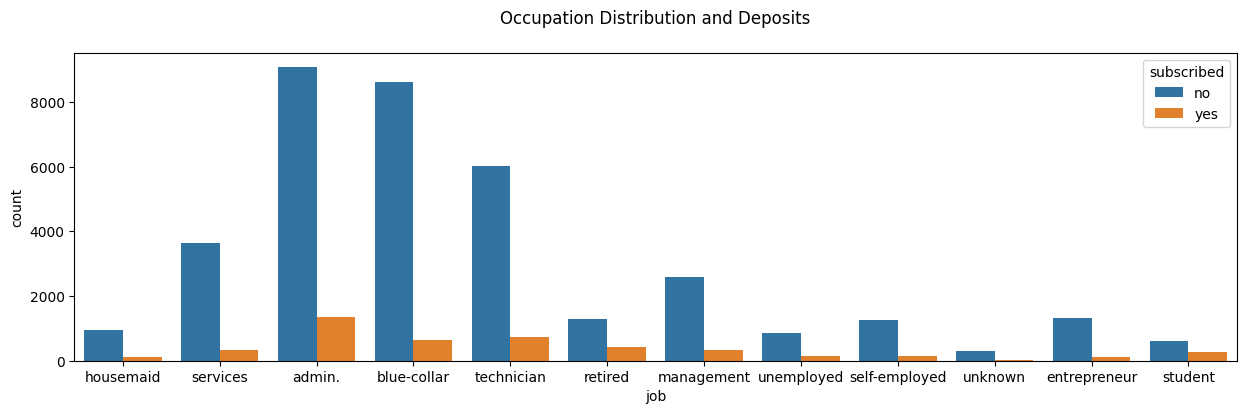

In [92]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank_data, hue ="subscribed")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

The majority of clients have occupation "Admin", "blue-collar" or "Technician", and the maximum clients subscribing to Term Deposit are also from these occupations.

###Distribution of Marital Status

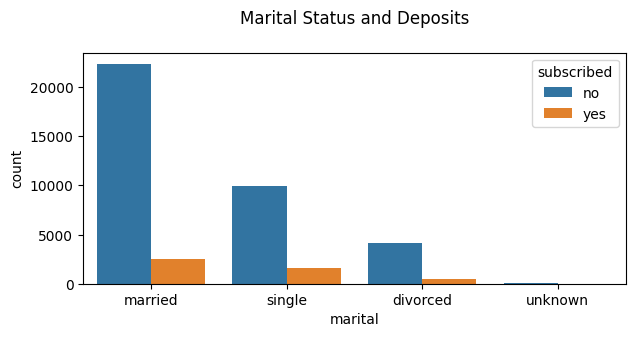

In [93]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank_data, hue ="subscribed")
plt.title("Marital Status and Deposits\n")
plt.show()

Clients are mostly married

###Distribution of Education Status

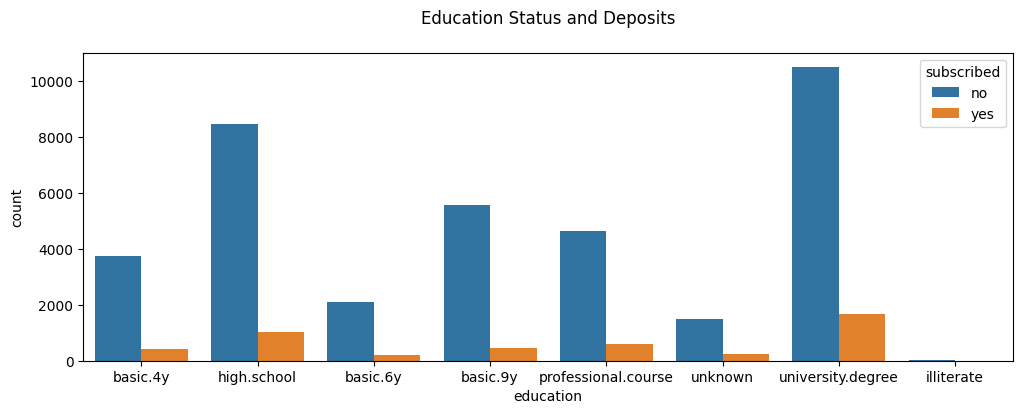

In [94]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank_data, hue ="subscribed")
plt.title("Education Status and Deposits\n")
plt.show()

Most of the clients have University degree and have studied a higher or professional course.a

###Credit defaults - any ?

In [95]:
bank_data.default.value_counts()

,count
default,
no,32588
unknown,8597
yes,3


The majority of clients do not have any Credit defaults. Only 3 clients have a Credit default

###Distribution of Housing Loan

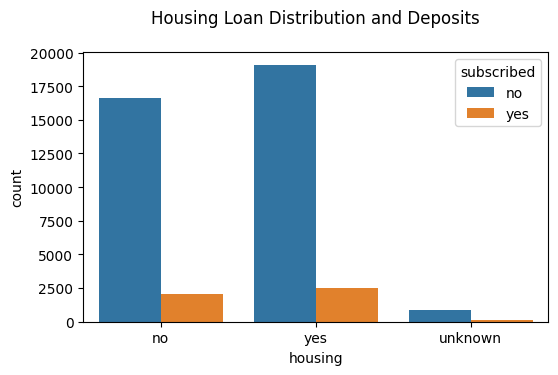

In [96]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank_data, hue ="subscribed")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

Clients subscribing to Term Deposits mostly have a Home loan

###Distribution of Personal Loan

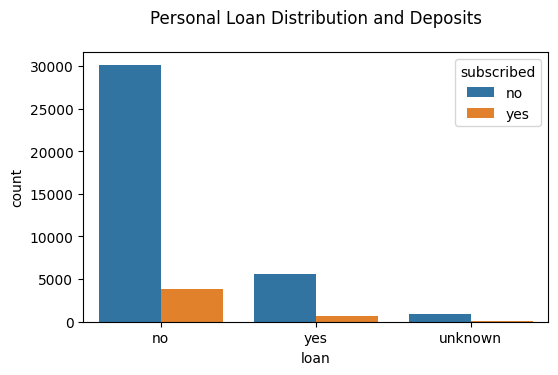

In [97]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank_data, hue ="subscribed")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits don't have a  have personal loan

###Distribution of Outcome (Term Deposits)

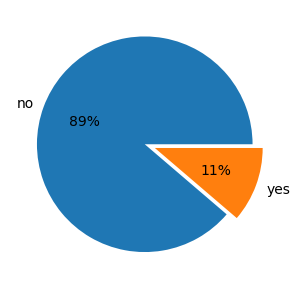

In [98]:
#Count of Outcome
bank_data.subscribed.value_counts()
target = bank_data.subscribed.value_counts().index
data = bank_data.subscribed.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=target,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to a Term Deposit

###**Model building**

###Label Encoding Categorical Features

In [99]:
cols = bank_data.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')

In [100]:
le = LabelEncoder()

bank_data[cols] = bank_data[cols].apply(le.fit_transform)
bank_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


###Correlation Analysis using Heatmap

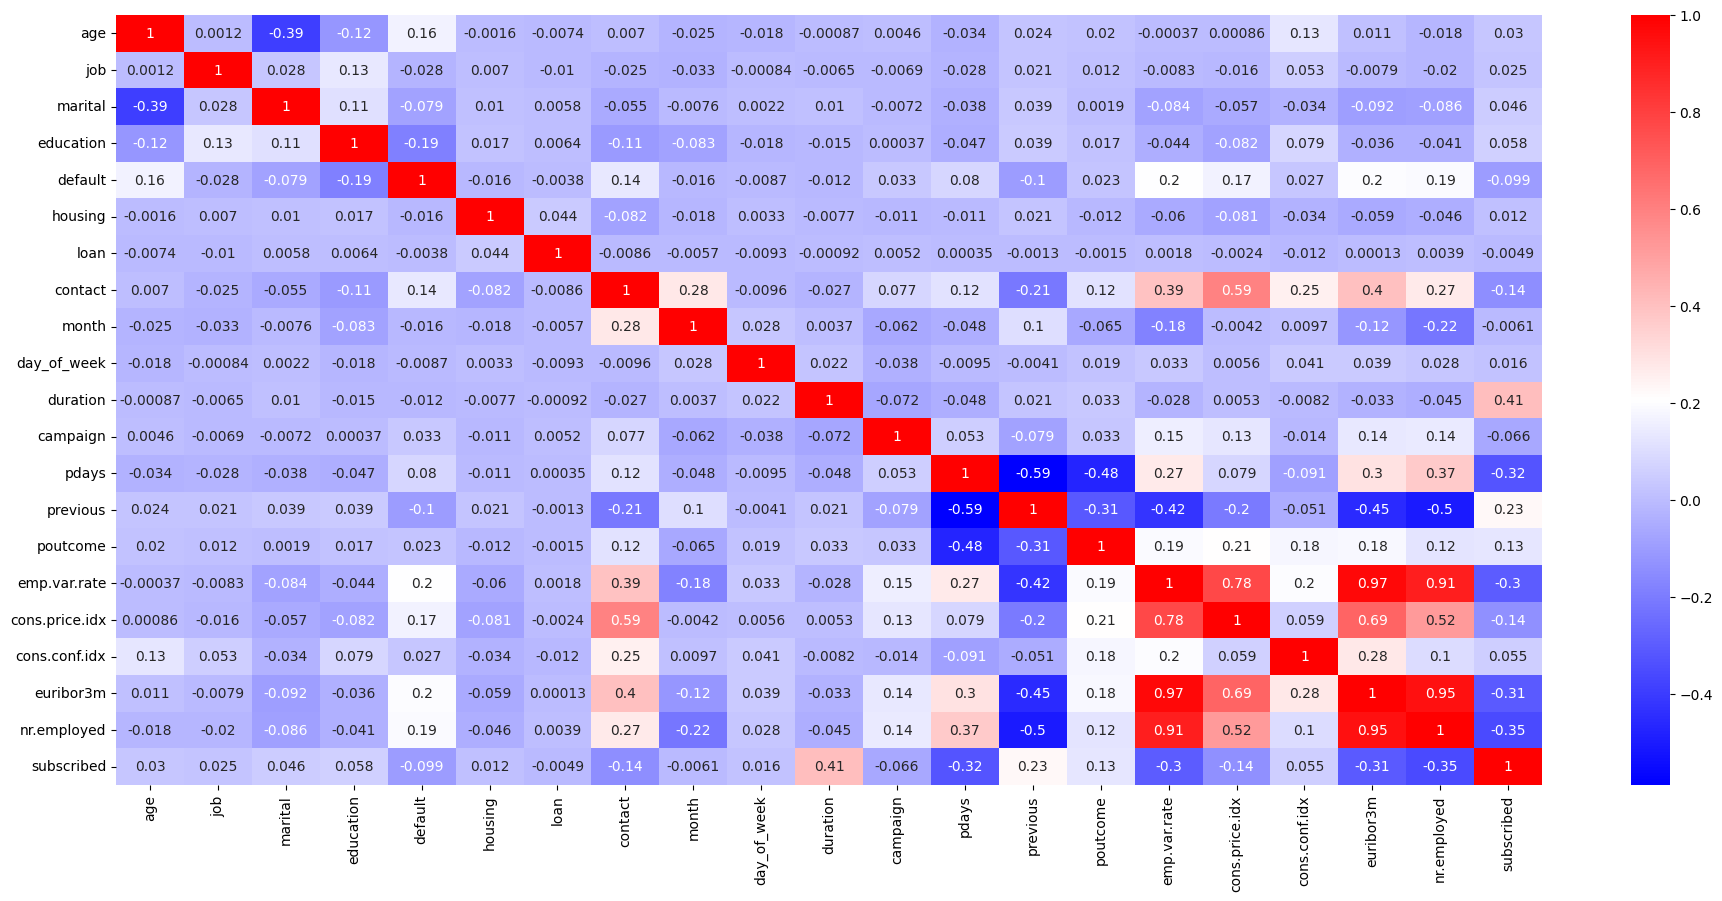

In [101]:
plt.figure(figsize=(23,10))
sns.heatmap(bank_data.corr(), cmap='bwr', annot=True)
plt.show()

Outcome "subscribed" is positively correlated with the duration of the call and also shows a slight correlation with previous attempts at the call. This implies that clients went ahead with Term deposit subscriptions after gaining sufficient insights from bank calls and persuasion.


###Standardisation

In [102]:
#Splitting input and output
X = bank_data.drop("subscribed", axis=1)
y = bank_data.subscribed

In [103]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

###**Model building - Decision Tree Classifier**

In [104]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [105]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [106]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8905883305009307


In [107]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10972
           1       0.51      0.52      0.52      1385

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



###Hyperparameter tunning

In [108]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [109]:
grid = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,
    verbose=1
)

grid.fit(train_X, train_y)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [110]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9}

In [111]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9)

In [112]:
cross_val_score(grid.best_estimator_, train_X, train_y, cv=5).mean()

np.float64(0.9145362087122294)

In [120]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 9)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9)

In [121]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9177274461517116
Test Score: 0.9130857004127215


In [122]:
pred_y = clf.predict(test_X)

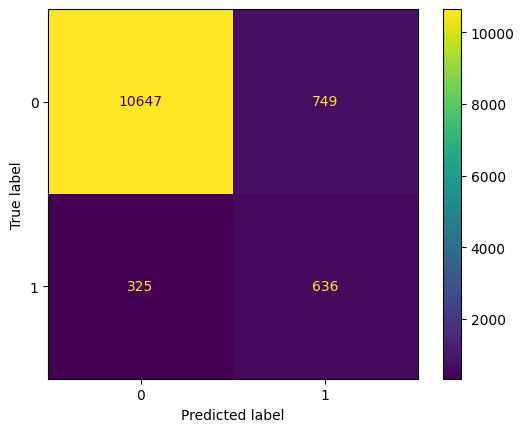

In [123]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [124]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11396
           1       0.46      0.66      0.54       961

    accuracy                           0.91     12357
   macro avg       0.71      0.80      0.75     12357
weighted avg       0.93      0.91      0.92     12357



In [125]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.30857004127215


In [126]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  90.79061449382415
